<a href="https://colab.research.google.com/github/TUQASAIF/Task1/blob/TASK1/U1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scipy.stats
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

In [ ]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [ ]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
#Find number of rows and columns

num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 100000
Number of columns: 9


In [ ]:
#Distribution
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

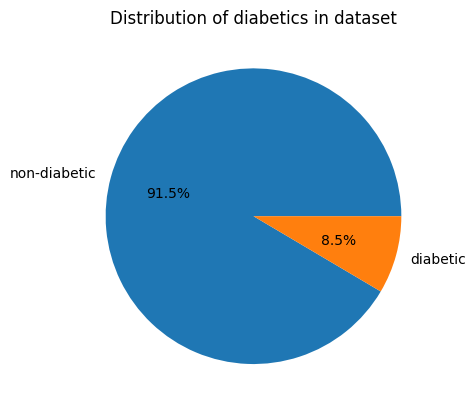

In [ ]:
plt.pie(data['diabetes'].value_counts(), labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

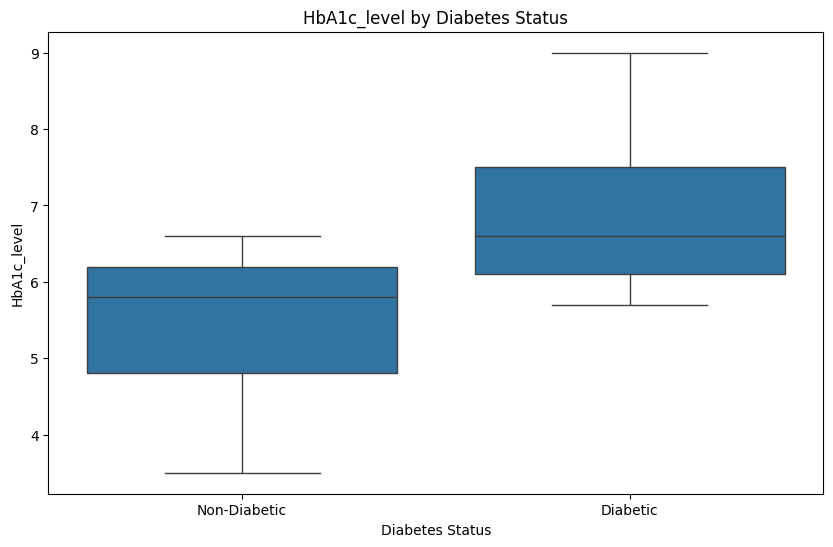

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('HbA1c_level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c_level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  # Adjust based on your 'diabetes' column encoding
plt.show()

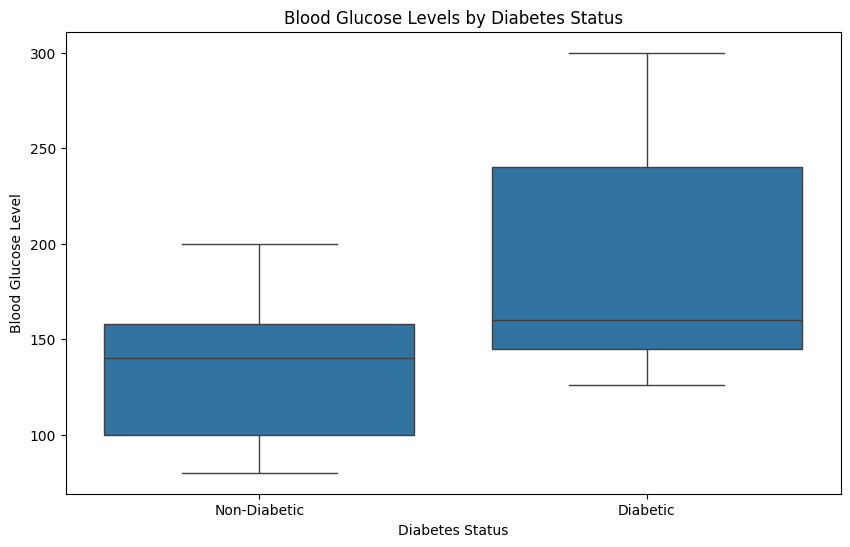

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  # Adjust based on your 'diabetes' column encoding
plt.show()

In [ ]:
## seperating numerical and categorical features for analysis

cat_data = data.select_dtypes(include='object')
num_data = data.select_dtypes(exclude='object')
print("Categorical Features: ", cat_data.columns.to_list())
print("Numerical Features: ", num_data.columns.to_list())

Categorical Features:  ['gender', 'smoking_history']
Numerical Features:  ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
#Find Missing Values

missing_values = data.isnull().sum().sum()
percentage_missing = (missing_values / data.shape[0]) * 100
print("Percentage of missing values:", percentage_missing)

Percentage of missing values: 0.0


In [ ]:
#Convert Categorical variables into binary and numeric
label_encoder = preprocessing.LabelEncoder()
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,4,25.19,6.60,140,0
1,0,54.00,0,0,0,27.32,6.60,80,0
2,1,28.00,0,0,4,27.32,5.70,158,0
3,0,36.00,0,0,1,23.45,5.00,155,0
4,1,76.00,1,1,1,20.14,4.80,155,0


In [ ]:
numeric_data = data.select_dtypes(include='number')
print(numeric_data)

       gender   age  hypertension  heart_disease  smoking_history   bmi  \
0           0 80.00             0              1                4 25.19   
1           0 54.00             0              0                0 27.32   
2           1 28.00             0              0                4 27.32   
3           0 36.00             0              0                1 23.45   
4           1 76.00             1              1                1 20.14   
...       ...   ...           ...            ...              ...   ...   
99995       0 80.00             0              0                0 27.32   
99996       0  2.00             0              0                0 17.37   
99997       1 66.00             0              0                3 27.83   
99998       0 24.00             0              0                4 35.42   
99999       0 57.00             0              0                1 22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0             6.60                  140        

In [ ]:
data.fillna(data.median(), inplace=True)

In [ ]:
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Selecting the numerical columns (excluding binary columns for hypertension, heart_disease, diabetes)
numerical_columns = ['age', 'bmi', 'HbA1c_level','smoking_history', 'blood_glucose_level']

In [ ]:
# Calculate Z-scores for numeric columns
z_scores = data[numerical_columns].apply(zscore)

print(z_scores)

        age   bmi  HbA1c_level  smoking_history  blood_glucose_level
0      1.69 -0.32         1.00             0.96                 0.05
1      0.54 -0.00         1.00            -1.15                -1.43
2     -0.62 -0.00         0.16             0.96                 0.49
3     -0.26 -0.58        -0.49            -0.62                 0.42
4      1.52 -1.08        -0.68            -0.62                 0.42
...     ...   ...          ...              ...                  ...
99995  1.69 -0.00         0.63            -1.15                -1.18
99996 -1.77 -1.50         0.91            -1.15                -0.93
99997  1.07  0.08         0.16             0.43                 0.42
99998 -0.79  1.22        -1.43             0.96                -0.93
99999  0.67 -0.74         1.00            -0.62                -1.18

[100000 rows x 5 columns]


In [ ]:
# Define threshold for outlier detection (e.g., Z-Score > 3)
threshold = 3
# Find outliers
outliers = data[z_scores > threshold]
print(outliers)

       gender  age  hypertension  heart_disease  smoking_history  bmi  \
0         NaN  NaN           NaN            NaN              NaN  NaN   
1         NaN  NaN           NaN            NaN              NaN  NaN   
2         NaN  NaN           NaN            NaN              NaN  NaN   
3         NaN  NaN           NaN            NaN              NaN  NaN   
4         NaN  NaN           NaN            NaN              NaN  NaN   
...       ...  ...           ...            ...              ...  ...   
99995     NaN  NaN           NaN            NaN              NaN  NaN   
99996     NaN  NaN           NaN            NaN              NaN  NaN   
99997     NaN  NaN           NaN            NaN              NaN  NaN   
99998     NaN  NaN           NaN            NaN              NaN  NaN   
99999     NaN  NaN           NaN            NaN              NaN  NaN   

       HbA1c_level  blood_glucose_level  diabetes  
0              NaN                  NaN       NaN  
1              NaN 

In [ ]:
# Count outliers
outliers_count = (z_scores.abs() > threshold).sum().sum()

print("Number of outliers:", outliers_count)

Number of outliers: 4012


In [ ]:
# normalization


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to verify the normalization
print(data.head())

   gender  age  hypertension  heart_disease  smoking_history  bmi  \
0       0 1.00             0              1             0.80 0.18   
1       0 0.67             0              0             0.00 0.20   
2       1 0.35             0              0             0.80 0.20   
3       0 0.45             0              0             0.20 0.16   
4       1 0.95             1              1             0.20 0.12   

   HbA1c_level  blood_glucose_level  diabetes  
0         0.56                 0.27         0  
1         0.56                 0.00         0  
2         0.40                 0.35         0  
3         0.27                 0.34         0  
4         0.24                 0.34         0  


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.00,0,1,0.80,0.18,0.56,0.27,0
1,0,0.67,0,0,0.00,0.20,0.56,0.00,0
2,1,0.35,0,0,0.80,0.20,0.40,0.35,0
3,0,0.45,0,0,0.20,0.16,0.27,0.34,0
4,1,0.95,1,1,0.20,0.12,0.24,0.34,0


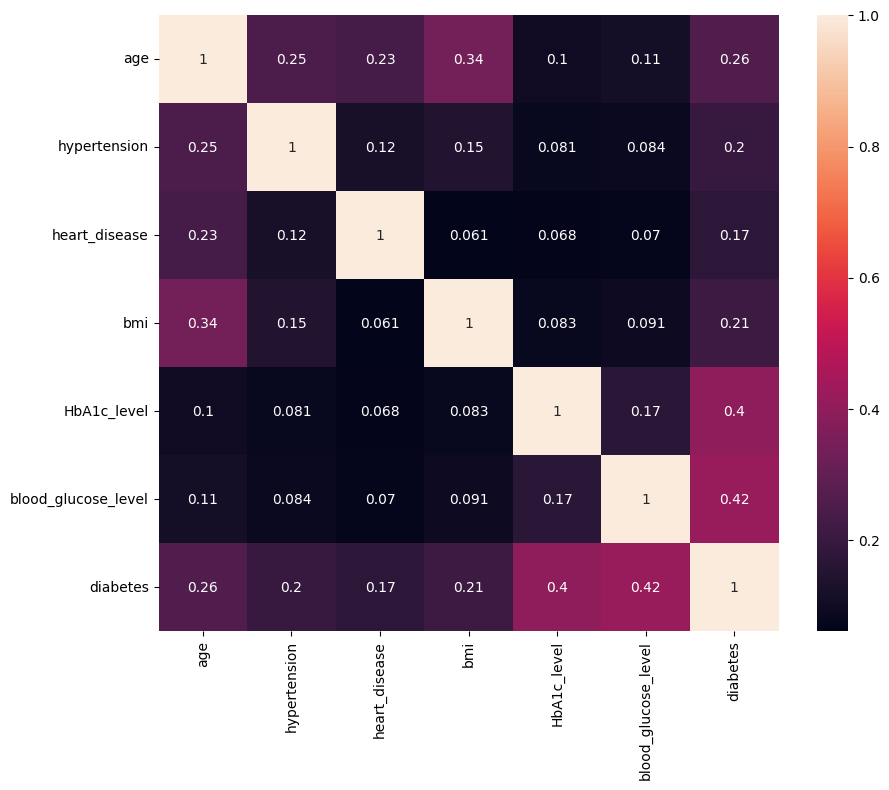

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=num_data.corr(),annot=True)
plt.show()

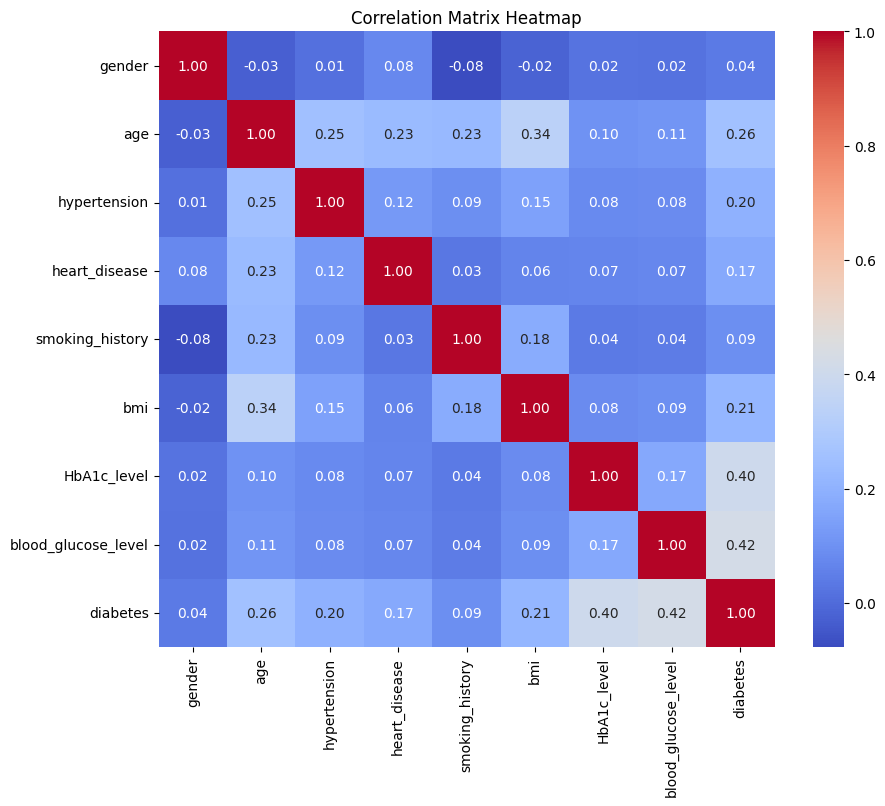

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size as desired
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']

In [ ]:

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train = pd.DataFrame((X_train_raw), columns=X_train_raw.columns)
X_test =  pd.DataFrame((X_test_raw), columns=X_test_raw.columns)
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,0.16,0,0,0.00,0.13,0.42,0.21
80184,0,0.04,0,0,0.00,0.13,0.27,0.30
19864,1,0.79,0,0,0.60,0.18,0.00,0.55
76699,0,0.02,0,0,0.80,0.09,0.47,0.21
92991,0,0.41,0,0,1.00,0.35,0.49,0.55


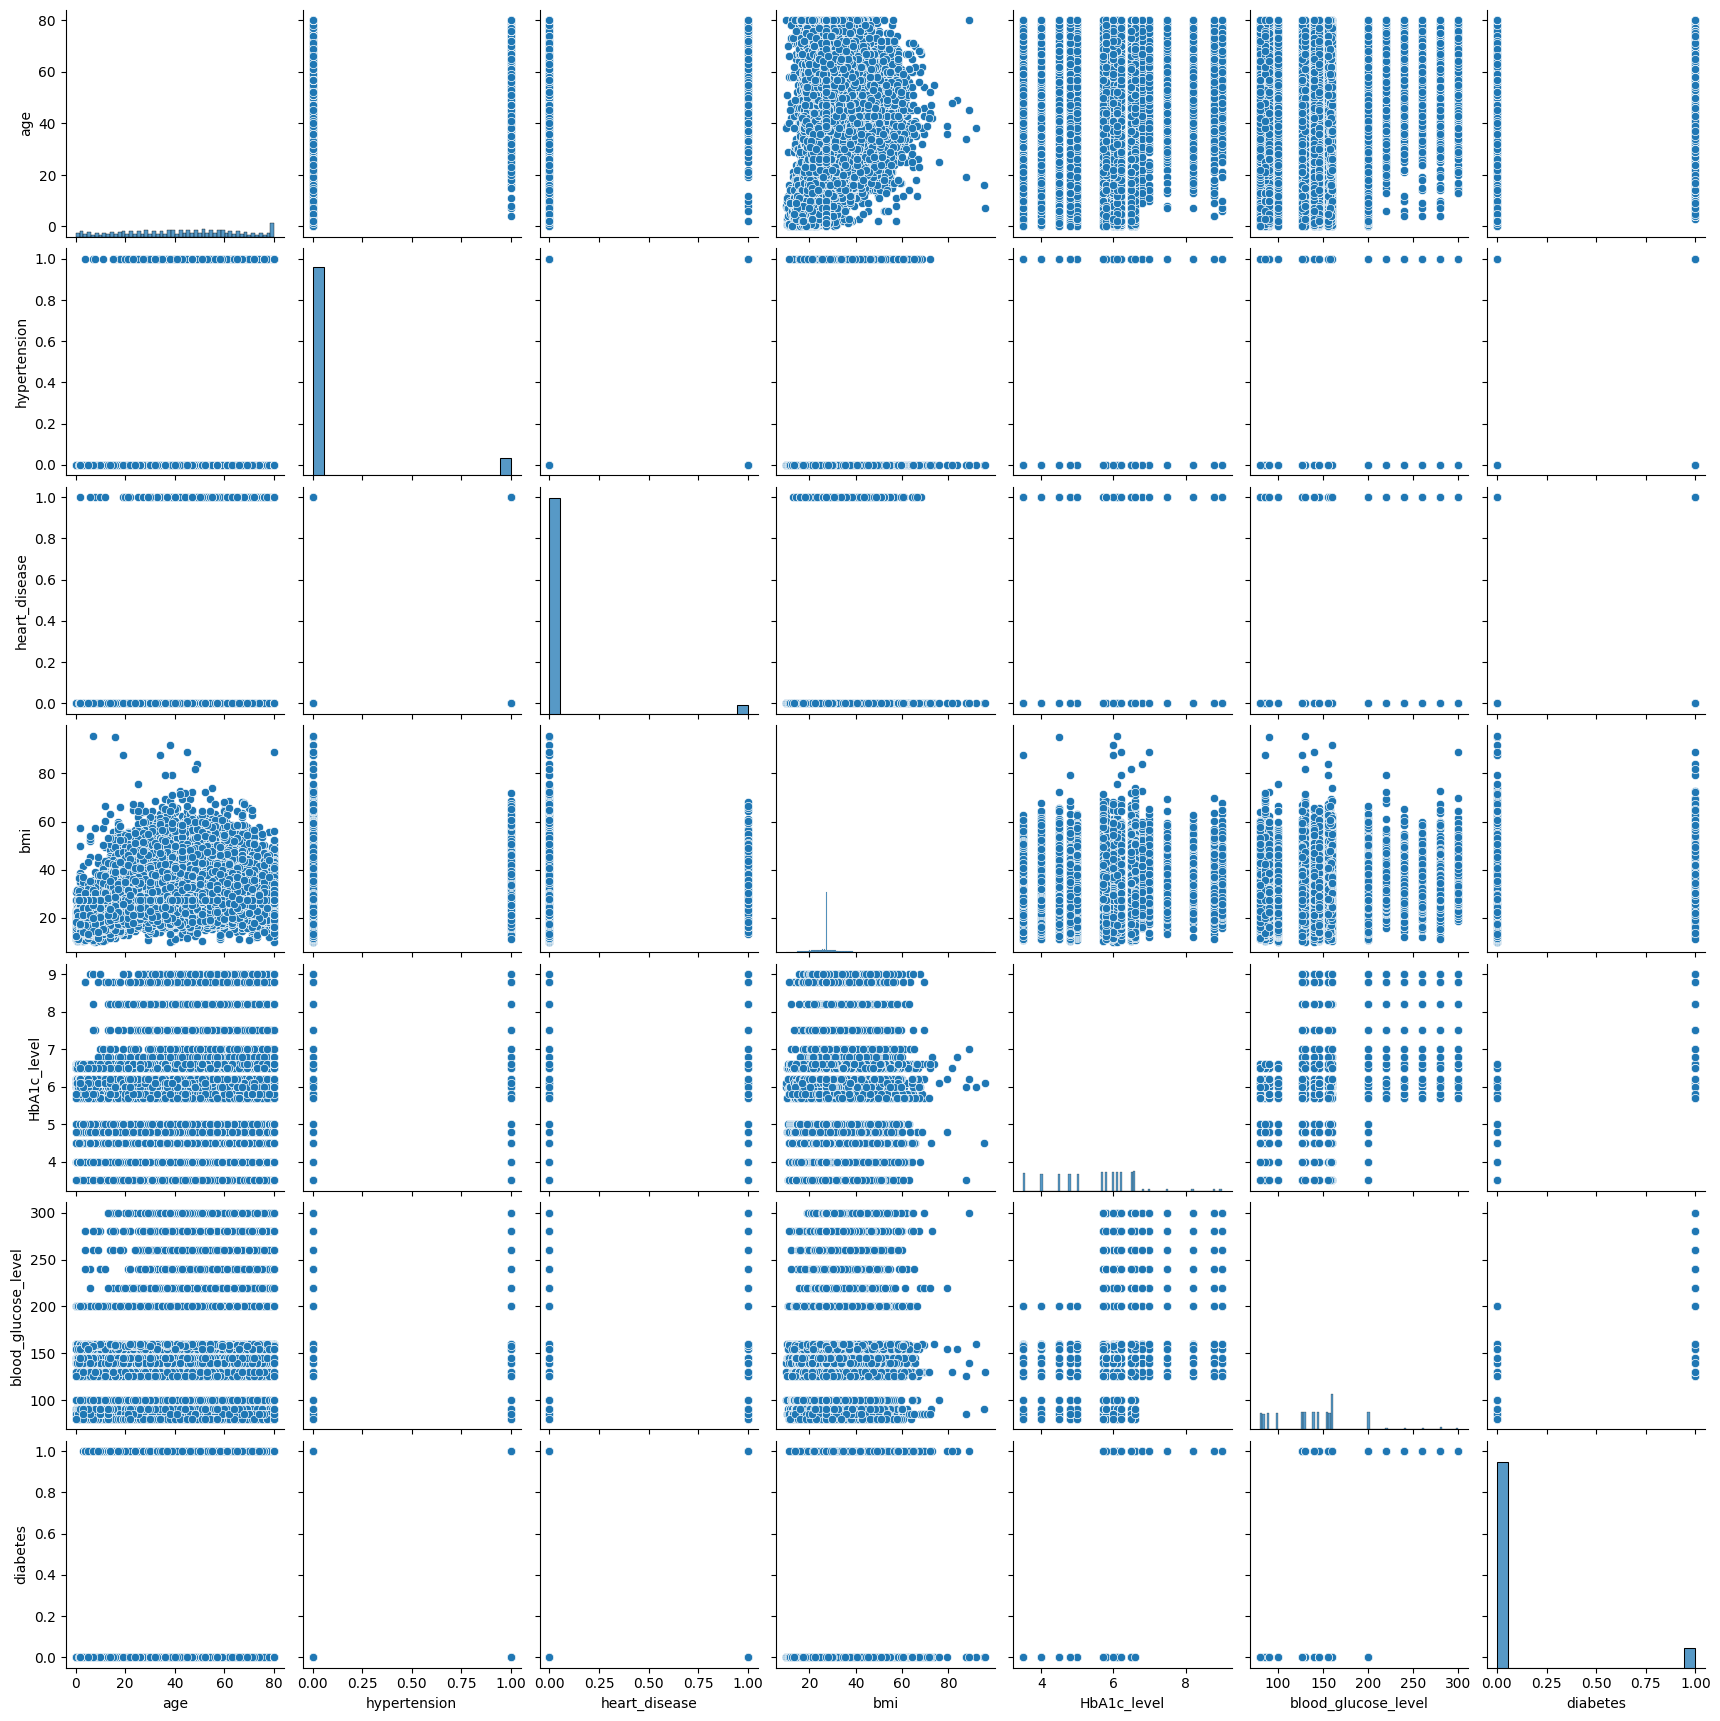

In [ ]:
sns.pairplot(num_data)
plt.show()

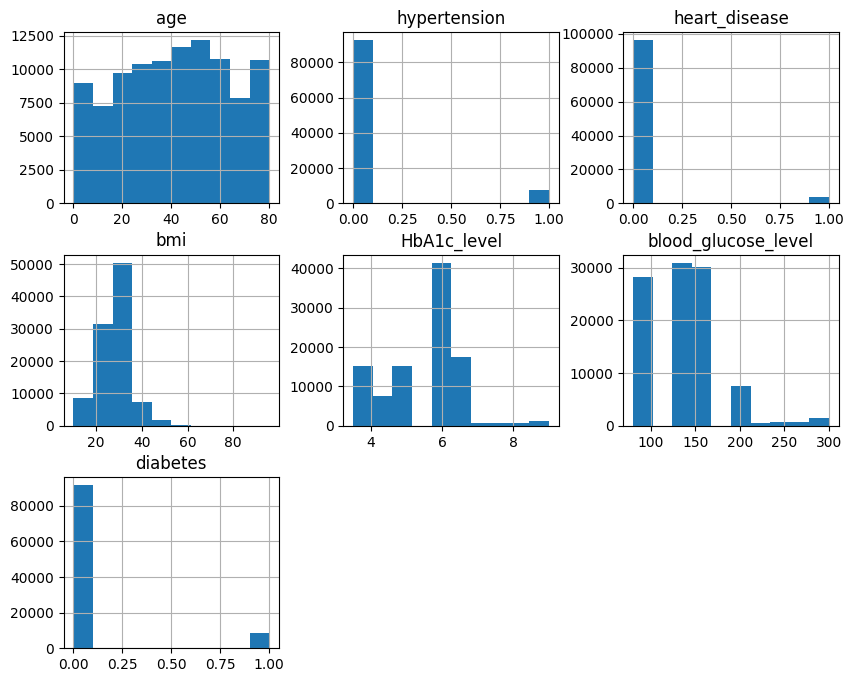

In [ ]:
num_data.hist(bins=10, figsize=(10, 8))
plt.show()

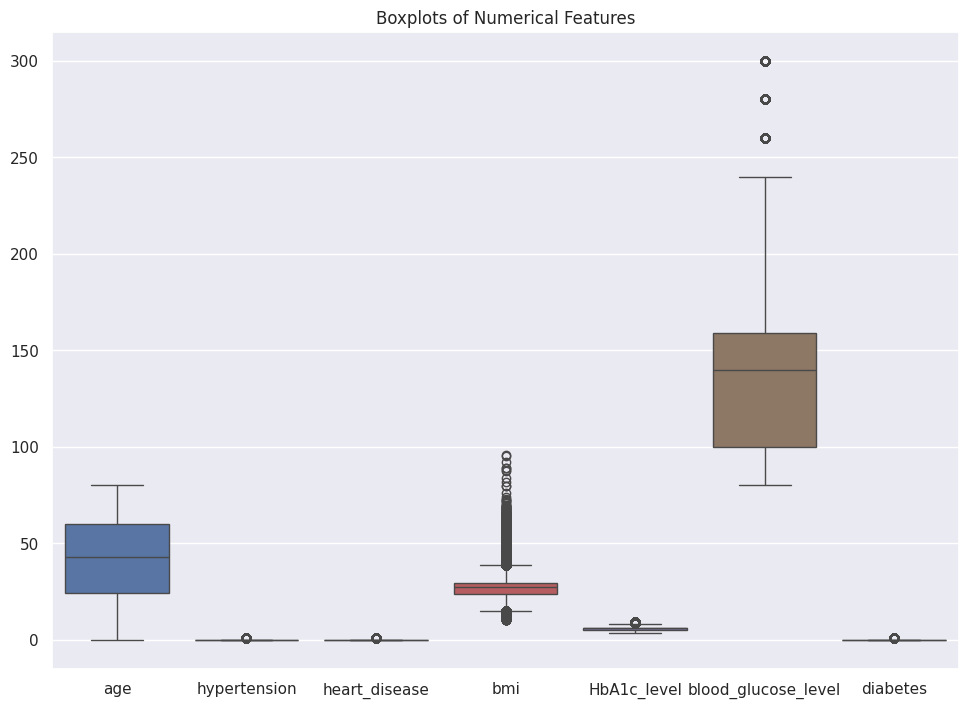

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=num_data)
plt.title('Boxplots of Numerical Features')
plt.show()

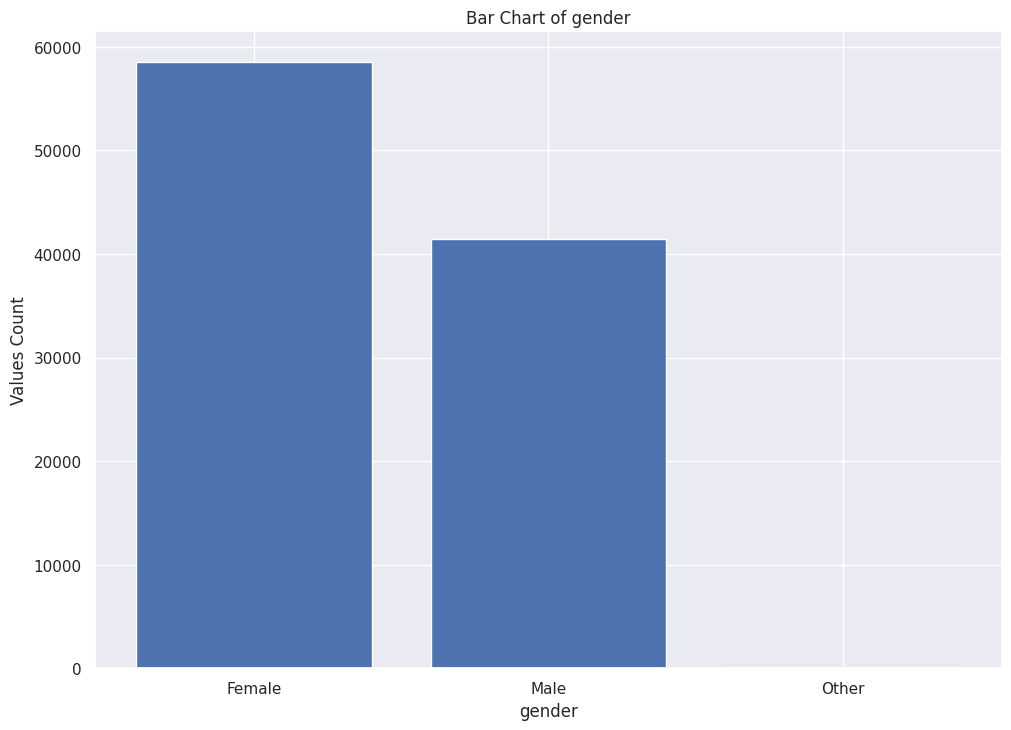

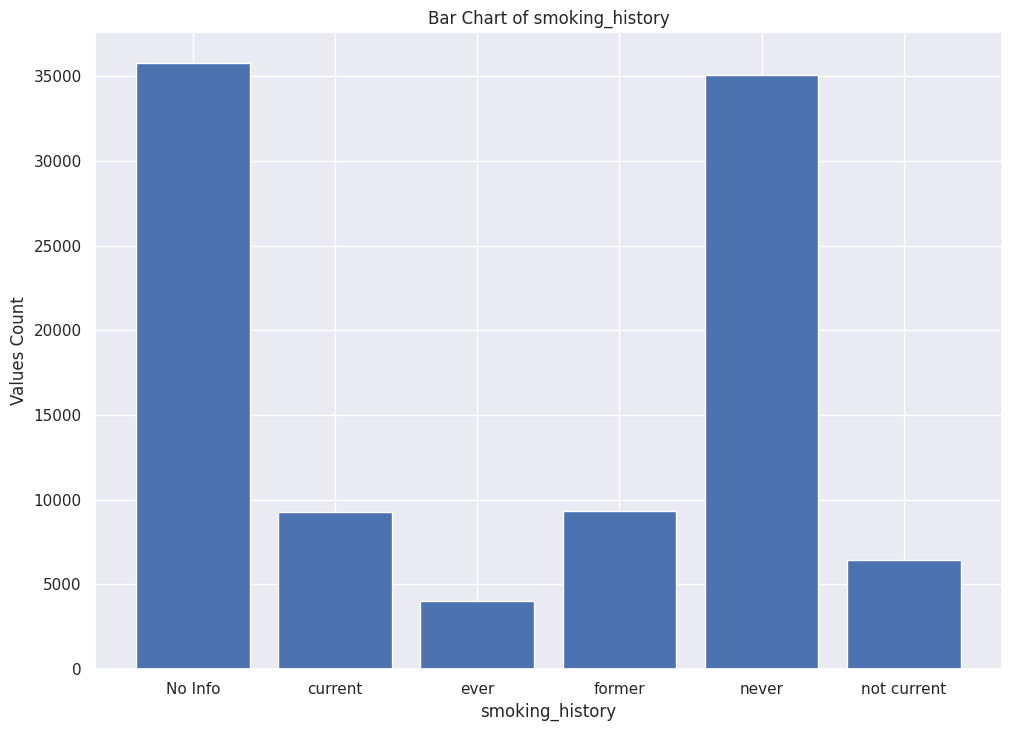

In [ ]:
# # Create a bar chart
for feature in cat_data.columns.to_list():
    uniques, counts = np.unique(cat_data[feature], return_counts=True)
    plt.bar(uniques, counts)
    plt.xlabel(feature)
    plt.ylabel('Values Count')
    plt.title(f'Bar Chart of {feature}')
    plt.show()

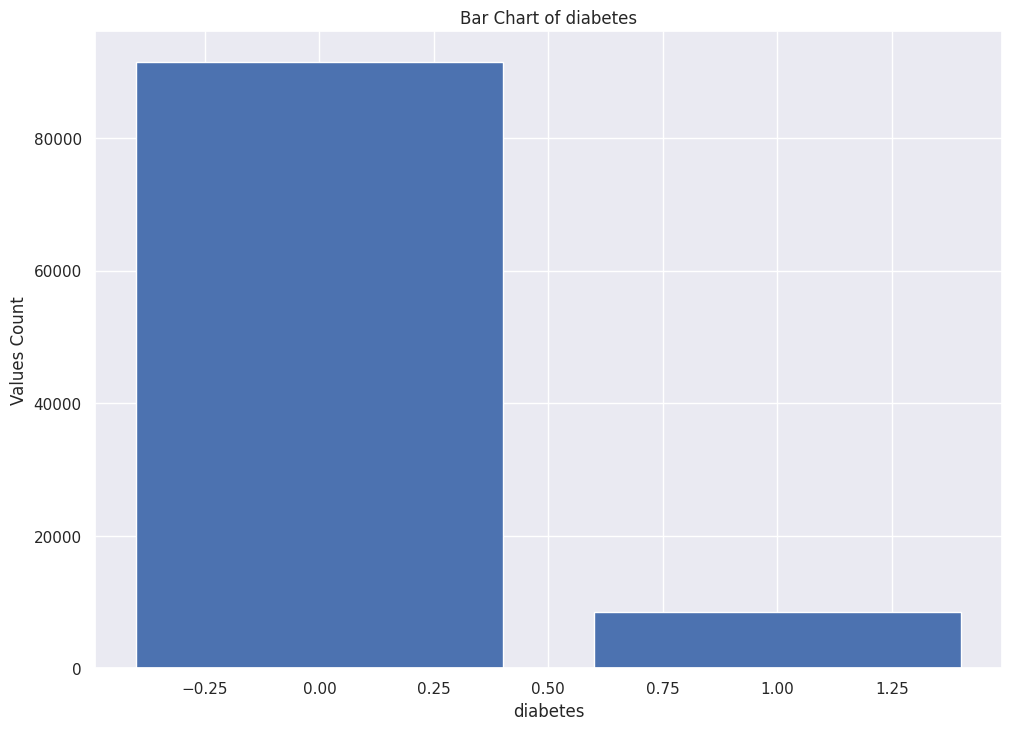

In [ ]:
feature = 'diabetes'
uniques, counts = np.unique(num_data[feature], return_counts=True)
plt.bar(uniques, counts)
plt.xlabel(feature)
plt.xlim()
plt.ylabel('Values Count')
plt.title(f'Bar Chart of {feature}')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
num_features = num_data.columns.to_list()[:-1]
scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features])

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_features = cat_data.columns.to_list()
encoder = LabelEncoder()
for feature in cat_features:
    data[feature] = encoder.fit_transform(data[feature])

In [ ]:

print(data.head(5))

   gender  age  hypertension  heart_disease  smoking_history  bmi  \
0       0 1.00          0.00           1.00                4 0.18   
1       0 0.67          0.00           0.00                0 0.20   
2       1 0.35          0.00           0.00                4 0.20   
3       0 0.45          0.00           0.00                1 0.16   
4       1 0.95          1.00           1.00                1 0.12   

   HbA1c_level  blood_glucose_level  diabetes  
0         0.56                 0.27         0  
1         0.56                 0.00         0  
2         0.40                 0.35         0  
3         0.27                 0.34         0  
4         0.24                 0.34         0  


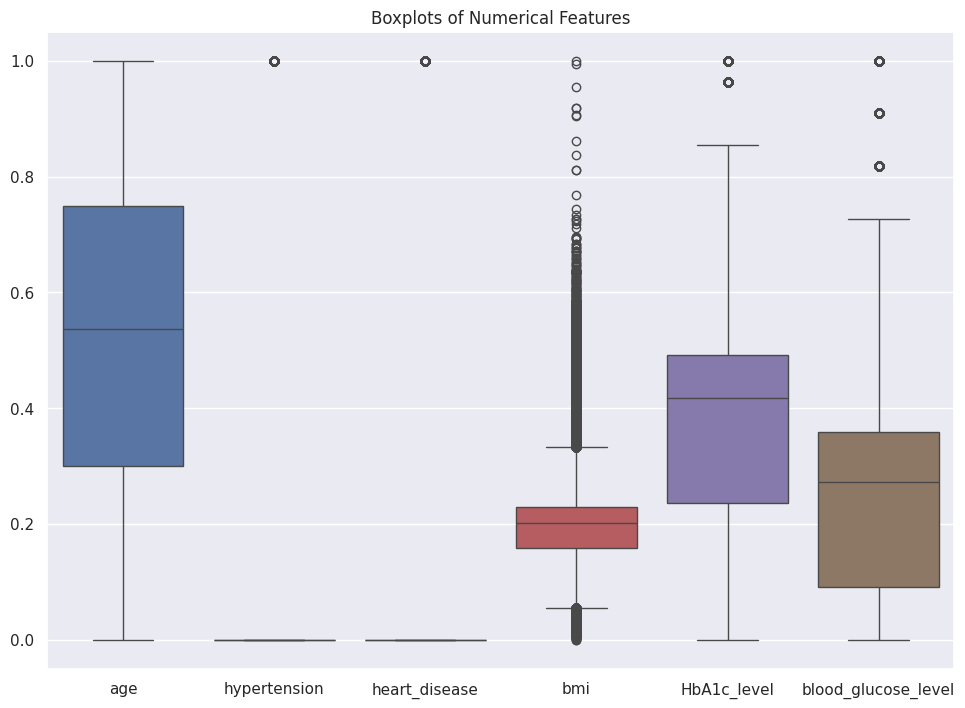

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=data[num_features])
plt.title('Boxplots of Numerical Features')
plt.show()

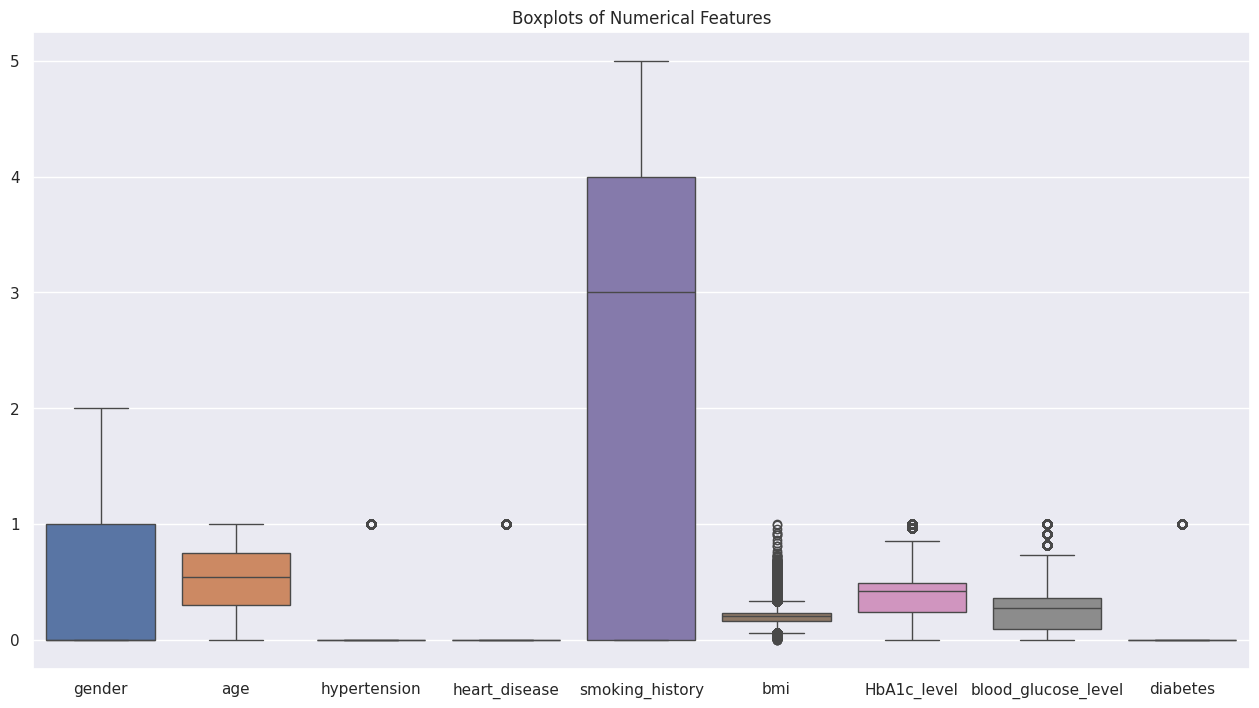

In [ ]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.boxplot(data=data)
plt.title('Boxplots of Numerical Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
features_list = data.columns.to_list()
features_data, target_data = data[features_list[:-1]], data[features_list[-1]]
print("Features: ", features_data.columns)
print("Target: ", target_data.name)
X_train, X_test, y_train, y_test = train_test_split(features_data, target_data, stratify=target_data, test_size=0.25)

Features:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')
Target:  diabetes


In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:

y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# probability of getting output as 0 - no diabetes

logreg.predict_proba(X_test)[:, 0]

array([0.97788281, 0.98461737, 0.99999009, ..., 0.92500598, 0.6655665 ,
       0.99943299])

In [ ]:
# probability of getting output as 0 - diabetes
logreg.predict_proba(X_test)[:, 1]

array([2.21171896e-02, 1.53826255e-02, 9.91244130e-06, ...,
       7.49940242e-02, 3.34433495e-01, 5.67006254e-04])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9600


In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9603


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9603
Test set score: 0.9600


In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.9429
Test set score: 0.9416


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[22695   180]
 [  819  1306]]

True Positives(TP) =  22695

True Negatives(TN) =  1306

False Positives(FP) =  180

False Negatives(FN) =  819


<Axes: >

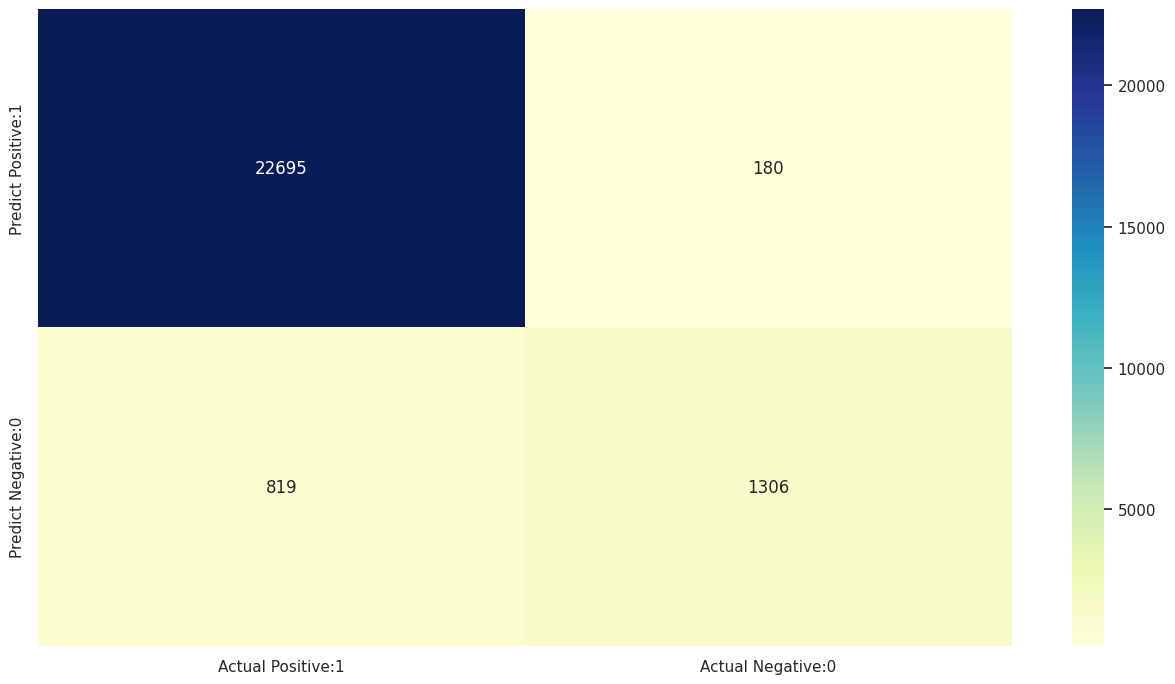

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.88      0.61      0.72      2125

    accuracy                           0.96     25000
   macro avg       0.92      0.80      0.85     25000
weighted avg       0.96      0.96      0.96     25000



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9600


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0400


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9921


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9652


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9652


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1211


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8789


In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.77882810e-01, 2.21171896e-02],
       [9.84617374e-01, 1.53826255e-02],
       [9.99990088e-01, 9.91244130e-06],
       [2.14158904e-02, 9.78584110e-01],
       [9.83592252e-01, 1.64077481e-02],
       [9.99624158e-01, 3.75841571e-04],
       [9.99971642e-01, 2.83578265e-05],
       [9.91824777e-01, 8.17522342e-03],
       [2.79877151e-05, 9.99972012e-01],
       [9.99851711e-01, 1.48289105e-04]])

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,10):

    cm1=0

    y_pred1 = logreg.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold = i/10)

    y_pred2 = np.where(y_pred2 == 1, 1, 0)

    cm1 = confusion_matrix(y_test, y_pred2)
    print(cm1)

    print ('With',i/10,'threshold the Confusion Matrix ','\n\n',cm1,'\n')

[[20643  2232]
 [  313  1812]]
With 0.1 threshold the Confusion Matrix  

 [[20643  2232]
 [  313  1812]] 

[[21833  1042]
 [  500  1625]]
With 0.2 threshold the Confusion Matrix  

 [[21833  1042]
 [  500  1625]] 

[[22319   556]
 [  621  1504]]
With 0.3 threshold the Confusion Matrix  

 [[22319   556]
 [  621  1504]] 

[[22563   312]
 [  735  1390]]
With 0.4 threshold the Confusion Matrix  

 [[22563   312]
 [  735  1390]] 

[[22695   180]
 [  819  1306]]
With 0.5 threshold the Confusion Matrix  

 [[22695   180]
 [  819  1306]] 

[[22775   100]
 [  912  1213]]
With 0.6 threshold the Confusion Matrix  

 [[22775   100]
 [  912  1213]] 

[[22833    42]
 [ 1009  1116]]
With 0.7 threshold the Confusion Matrix  

 [[22833    42]
 [ 1009  1116]] 

[[22865    10]
 [ 1127   998]]
With 0.8 threshold the Confusion Matrix  

 [[22865    10]
 [ 1127   998]] 

[[22874     1]
 [ 1337   788]]
With 0.9 threshold the Confusion Matrix  

 [[22874     1]
 [ 1337   788]] 



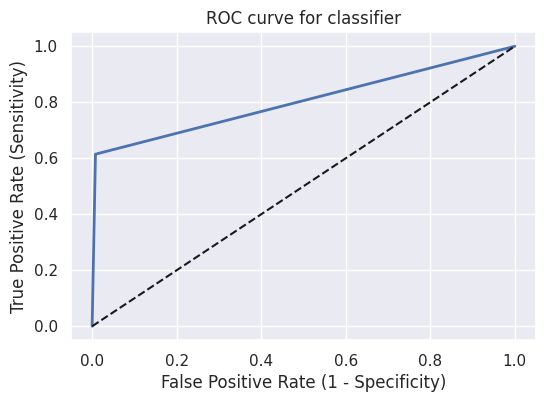

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8034


In [ ]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9617


In [ ]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.9584     0.96106667 0.95953333 0.96306667 0.95973333]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9604


In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9604


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9600


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
# Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

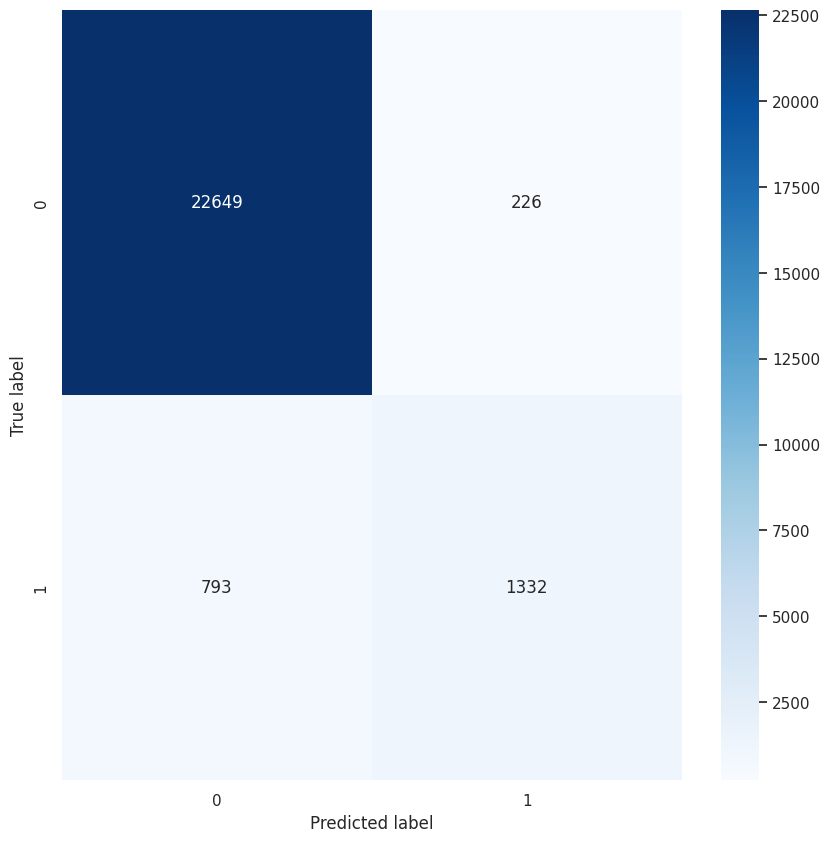

Accuracy: 0.95924
F1 Score: 0.7233233776812381


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print accuracy and F1 score
print('Accuracy:', accuracy)
print('F1 Score:', f1)

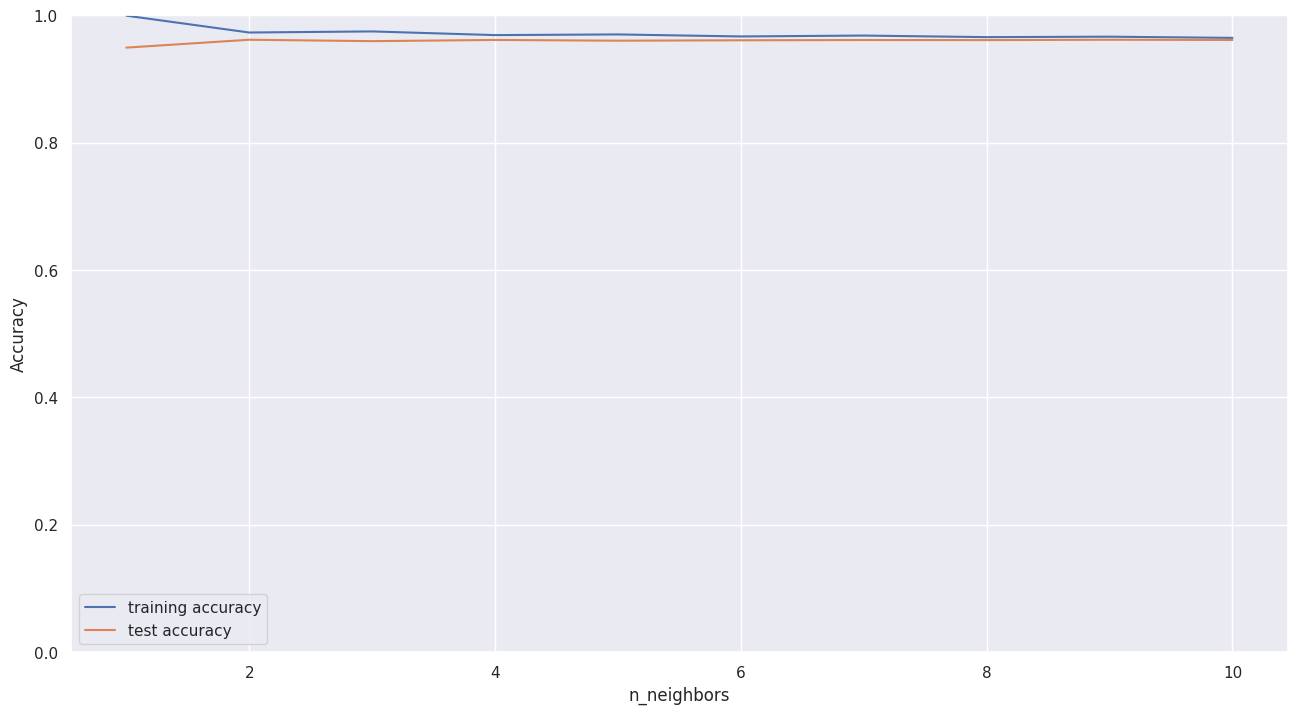

In [ ]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
possible_neighbors = range(1, 11)

for n_neighbors in possible_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # training accuracy
    training_accuracy.append(clf.score(X_train, y_train))

    # testing accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(possible_neighbors, training_accuracy, label="training accuracy")
plt.plot(possible_neighbors, test_accuracy, label="test accuracy");
plt.ylim((0,1))
plt.ylabel("Accuracy");
plt.xlabel("n_neighbors");
plt.legend();

In [ ]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

y_pred_test2= model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     68625
           1       0.98      0.62      0.76      6375

    accuracy                           0.97     75000
   macro avg       0.97      0.81      0.87     75000
weighted avg       0.97      0.97      0.96     75000



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.88      0.61      0.72      2125

    accuracy                           0.96     25000
   macro avg       0.92      0.80      0.85     25000
weighted avg       0.96      0.96      0.96     25000



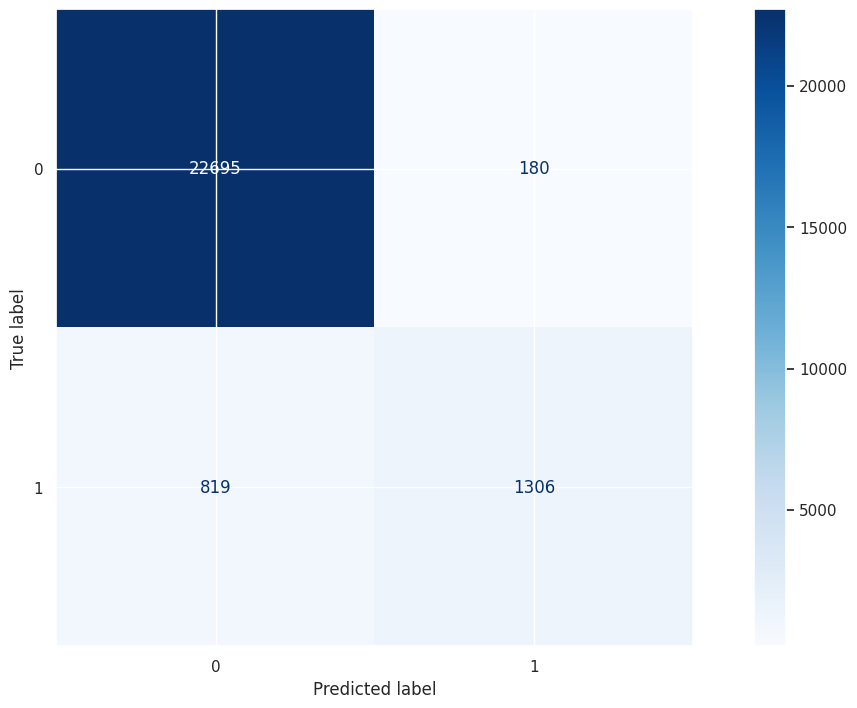

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_);
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test, y_true=y_test, display_labels=model.classes_, cmap='Blues');

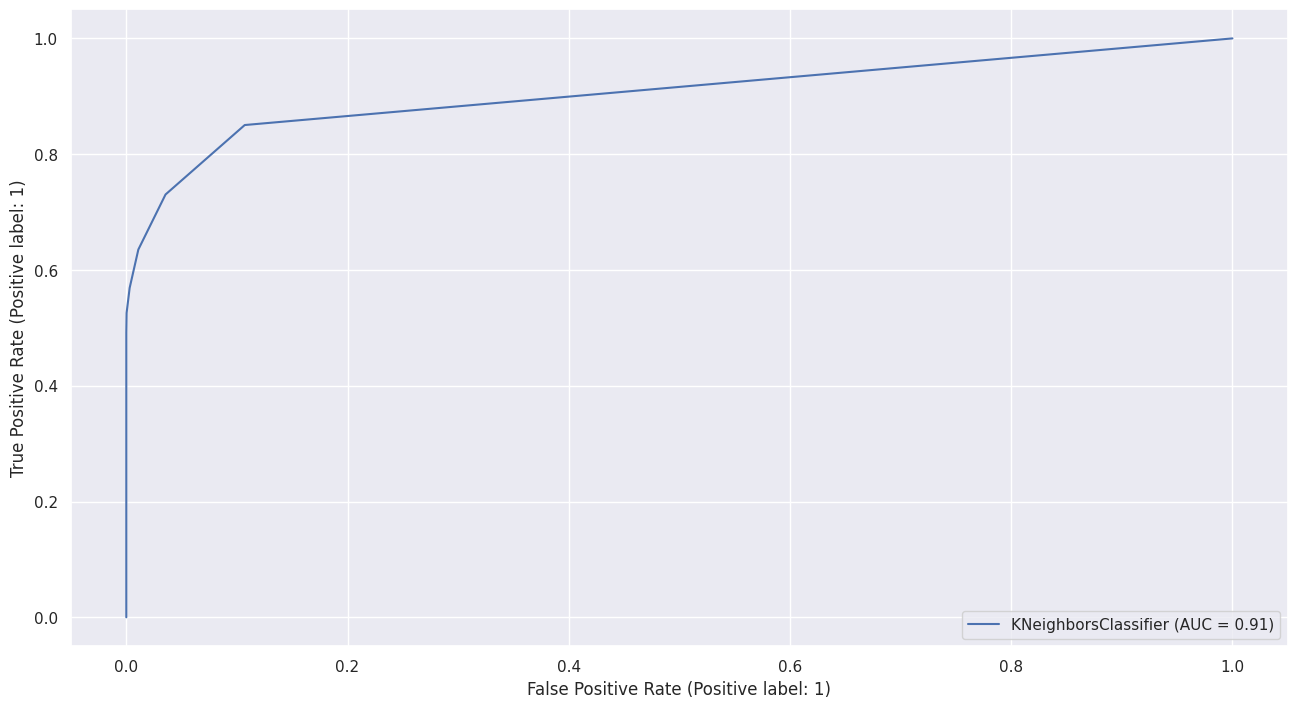

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8033596914175507

In [ ]:
display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

NameError: name 'PrecisionRecallDisplay' is not defined

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=6, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

[Text(0.703125, 0.9285714285714286, 'x[6] <= 0.582\ngini = 0.156\nsamples = 75000\nvalue = [68625, 6375]'),
 Text(0.640625, 0.7857142857142857, 'x[7] <= 0.591\ngini = 0.091\nsamples = 72084\nvalue = [68625, 3459]'),
 Text(0.578125, 0.6428571428571429, 'x[1] <= 0.668\ngini = 0.057\nsamples = 70719\nvalue = [68625, 2094]'),
 Text(0.40625, 0.5, 'x[5] <= 0.341\ngini = 0.024\nsamples = 48569\nvalue = [47989, 580]'),
 Text(0.25, 0.35714285714285715, 'x[2] <= 0.5\ngini = 0.019\nsamples = 46295\nvalue = [45862, 433]'),
 Text(0.125, 0.21428571428571427, 'x[6] <= 0.336\ngini = 0.016\nsamples = 45179\nvalue = [44818, 361]'),
 Text(0.0625, 0.07142857142857142, 'gini = 0.0\nsamples = 18581\nvalue = [18581, 0]'),
 Text(0.1875, 0.07142857142857142, 'gini = 0.027\nsamples = 26598\nvalue = [26237, 361]'),
 Text(0.375, 0.21428571428571427, 'x[6] <= 0.336\ngini = 0.121\nsamples = 1116\nvalue = [1044, 72]'),
 Text(0.3125, 0.07142857142857142, 'gini = 0.0\nsamples = 398\nvalue = [398, 0]'),
 Text(0.4375, 0

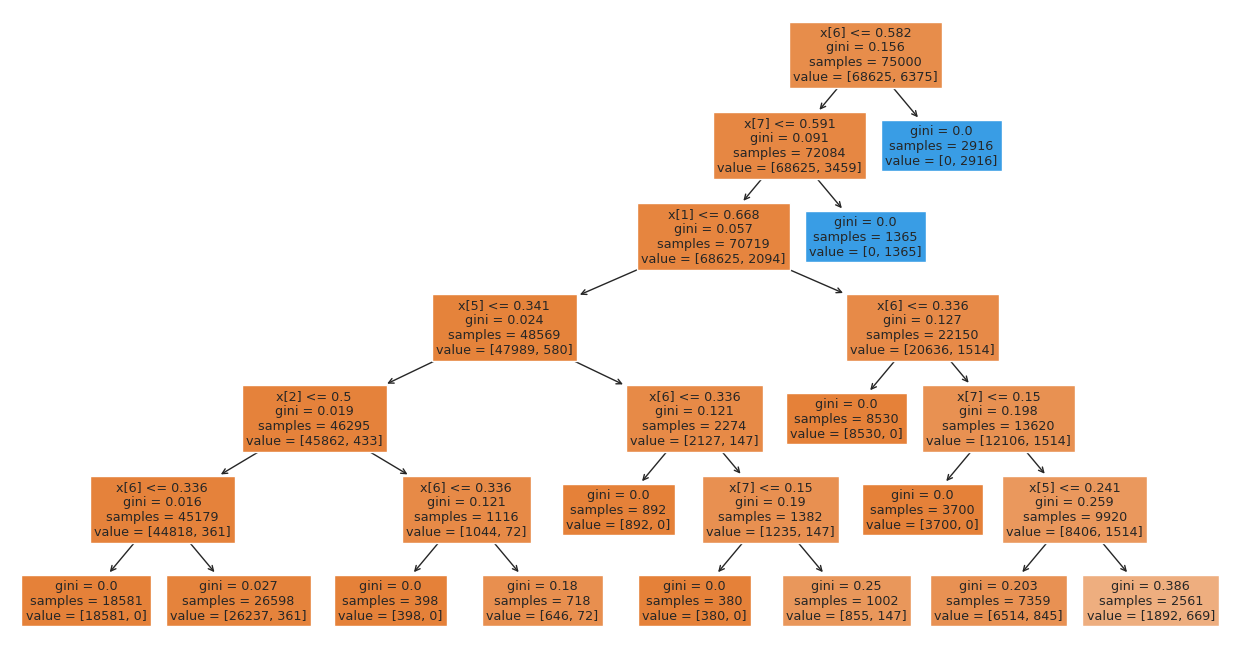

In [ ]:
plot_tree(clf, filled=True)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

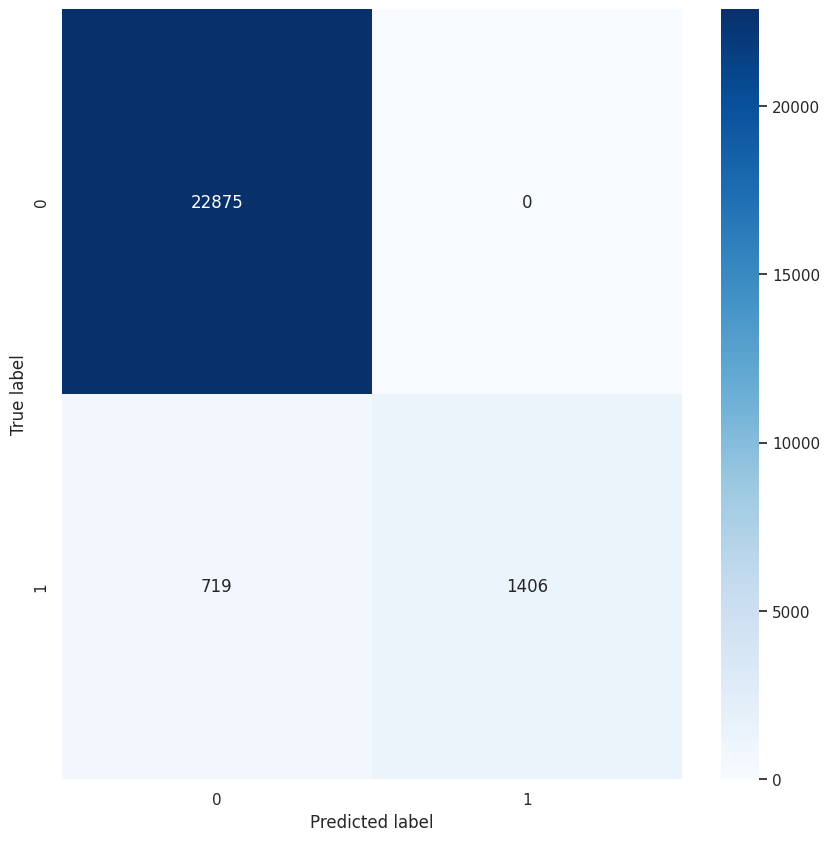

Accuracy: 0.97124
F1 Score: 0.7963749645992636


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

# Print accuracy and F1 score
print('Accuracy:', accuracy)
print('F1 Score:', f1)

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

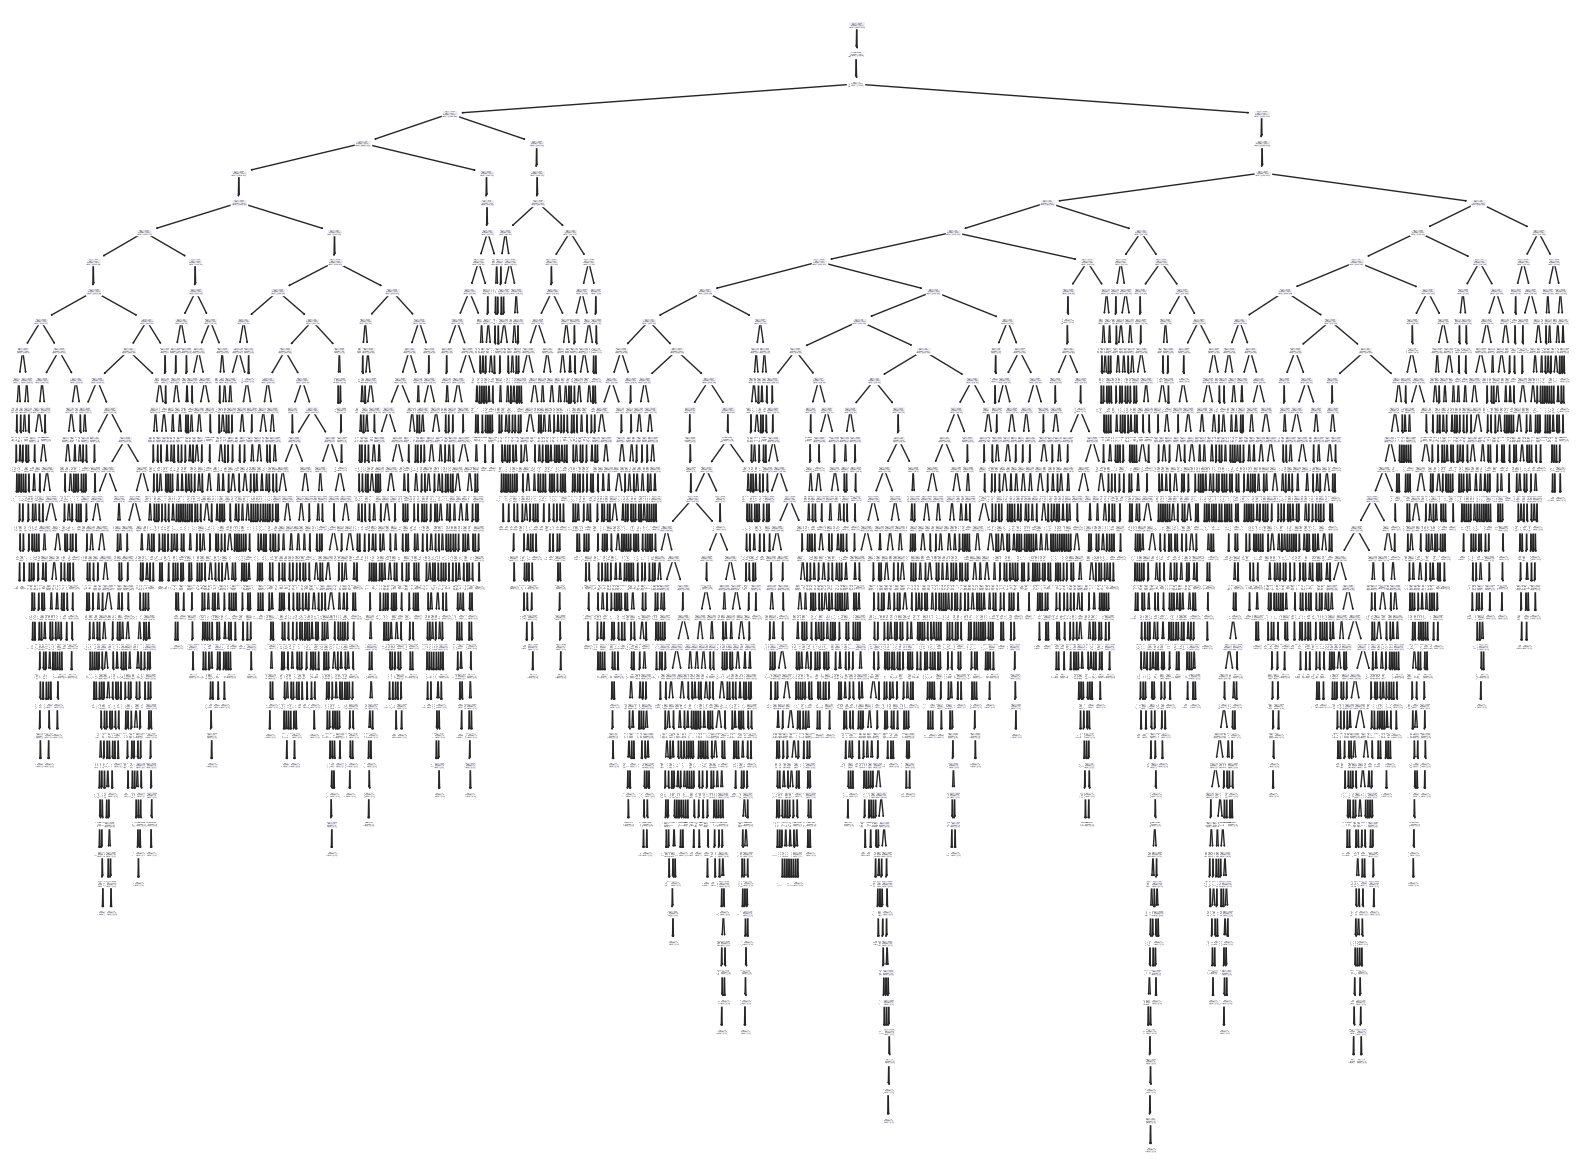

In [ ]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(model);

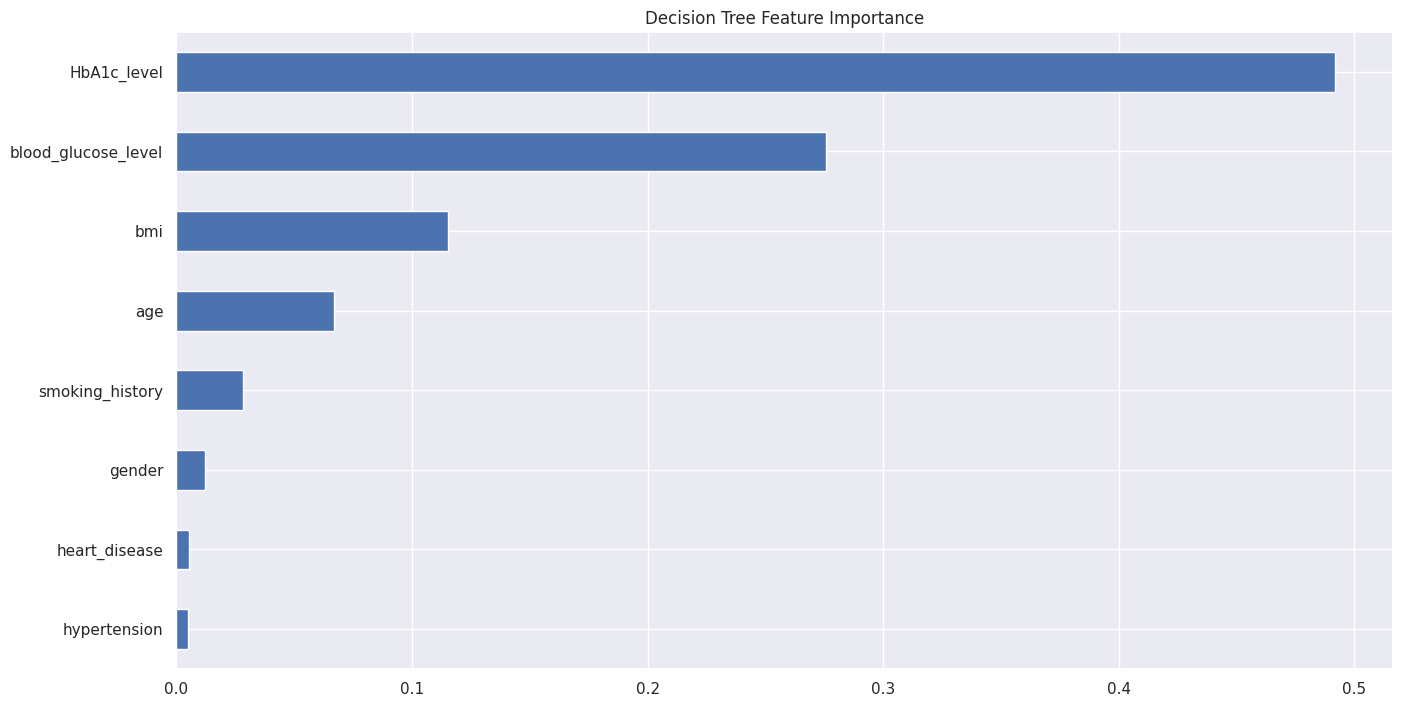

In [ ]:
feature_importances = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values()
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train= model.predict(X_train)

In [ ]:
train_decision_tree_report = classification_report(y_train, y_pred_train)
print(train_decision_tree_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68625
           1       1.00      0.99      1.00      6375

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000



In [ ]:
test_decision_tree_report = classification_report(y_test, y_pred_test)
print(test_decision_tree_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22875
           1       0.70      0.74      0.72      2125

    accuracy                           0.95     25000
   macro avg       0.84      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000



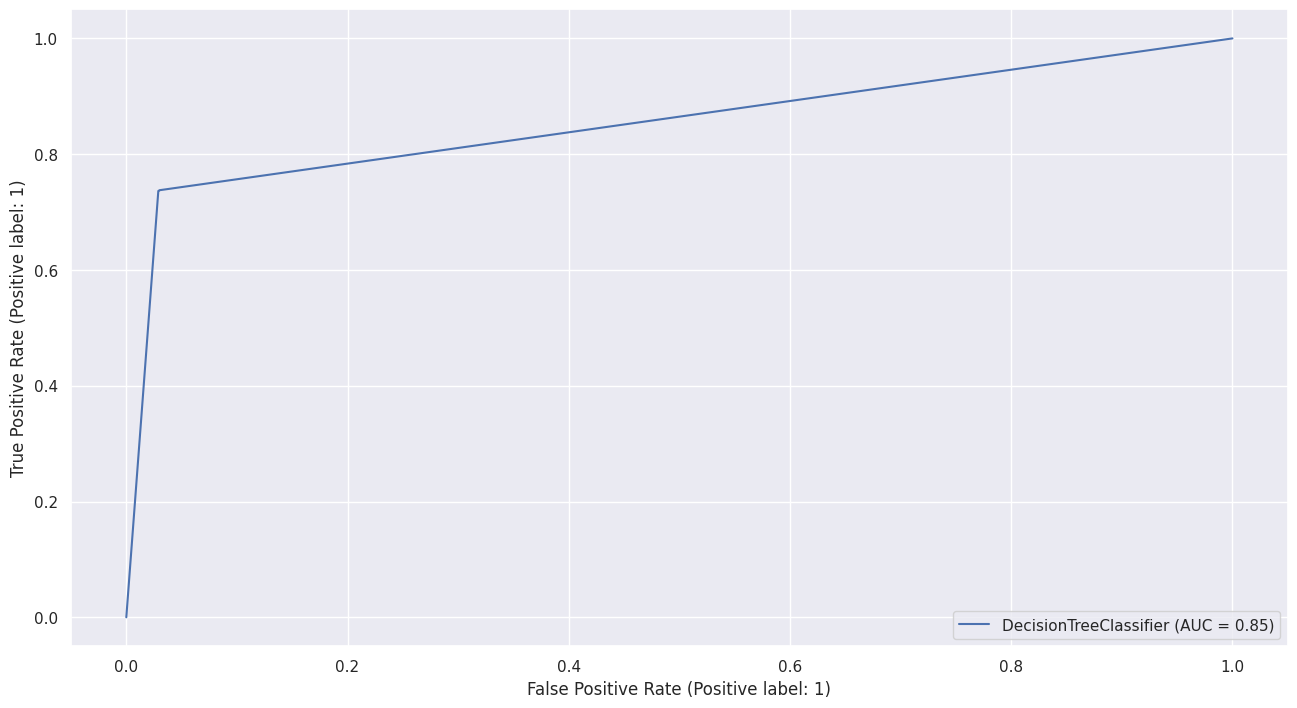

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8537434908389584

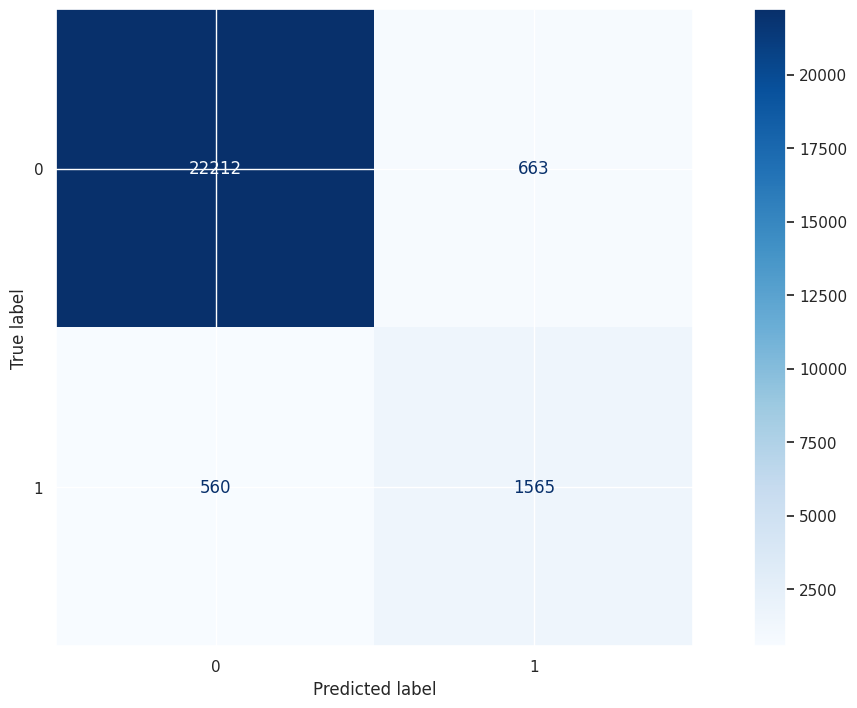

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_);
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test, y_true=y_test, display_labels=model.classes_, cmap='Blues');

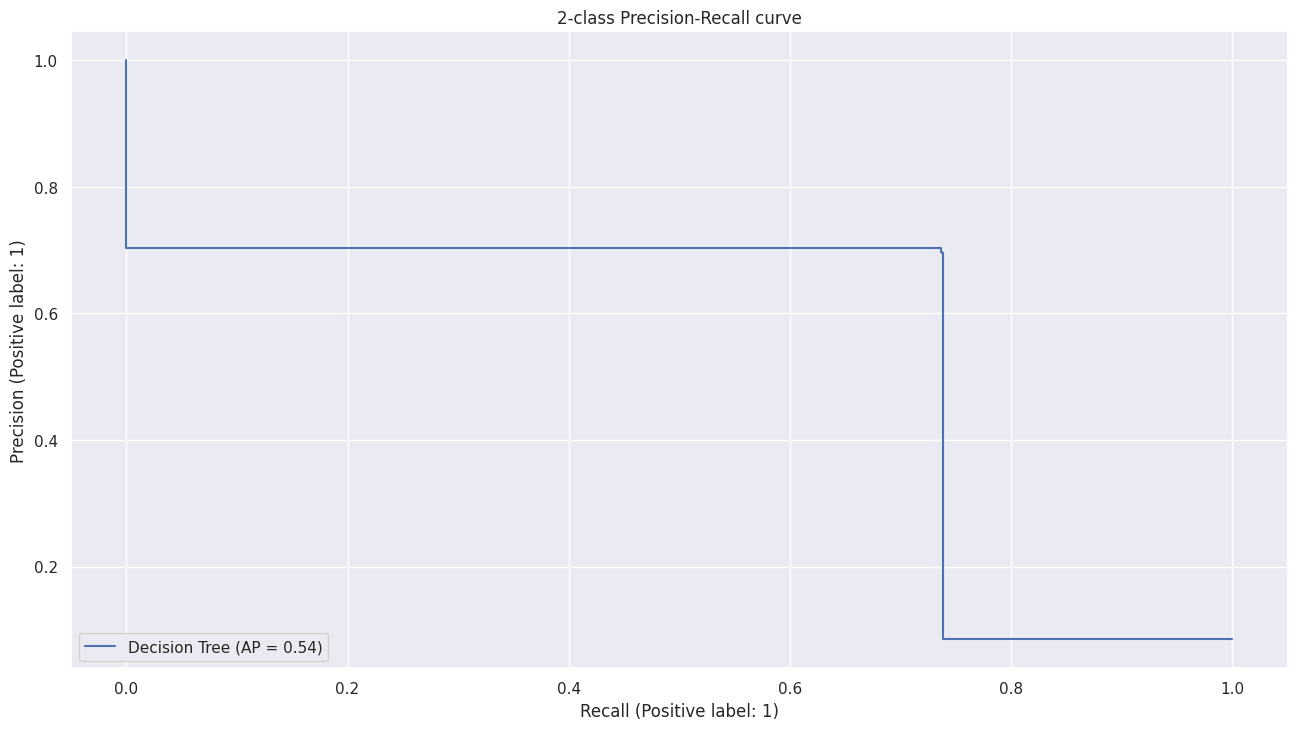

In [ ]:
display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")